# 1. Know your Data

### Import Libraries

In [1]:
# Import necessary libraries
# Import pandas and numpy for data processing and data wrangling
import pandas as pd
import numpy as np

# Import tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import Model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load the Dataset

In [2]:
# Loading the dataset
df = pd.read_csv("Advertising.csv")

### Dataset View

In [3]:
# Displaying first few rows of the Dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Dataset Rows and Columns Count

In [4]:
# Displaying the number of rows and columns
print("Number of rows are: ", df.shape[0])
print("Number of columns are: ", df.shape[1])

Number of rows are:  200
Number of columns are:  5


### Dataset Information

In [5]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### Duplicate Values

In [6]:
# Check for duplicate row count
dup = df.duplicated().sum()
print("Number of duplicate rows: ", dup)

Number of duplicate rows:  0


### Missing values/Null values

In [7]:
# Check for Missing/Null value count
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

**Here are the things we got to know about the dataset:**

The Advertising dataset contains information on Sales related to TV, Radio, and Newspaper advertisements. The dataset comprises 200 rows and 5 columns. There are no duplicate values or null values in the dataset.

# 2. Understanding the Variables

In [8]:
# Dataset columns
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
# Dataset describe
df.describe(include = 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


### Check for unique values

In [10]:
for i in df.columns.tolist():
    print("Number of unique values in", i, "is", df[i].nunique())

Number of unique values in Unnamed: 0 is 200
Number of unique values in TV is 190
Number of unique values in Radio is 167
Number of unique values in Newspaper is 172
Number of unique values in Sales is 121


# 3. Data Wrangling

In [11]:
# Removing all the 'Unnamed: 0' column as it is no longer required
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [12]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
# Defining Dependent Variable
dependent_variable = ['Sales']

**Here is a refined version of the manipulations performed and the insights gained:**
- Dropped all the 'Unnamed: 0' column from the DataFrame.
- Defined the dependent variable.

# 4. Data Visualization, Storytelling and Experimenting with Charts: Understand the relationships between variables

### Chart 1 - Numerical Variable vs Target Variable

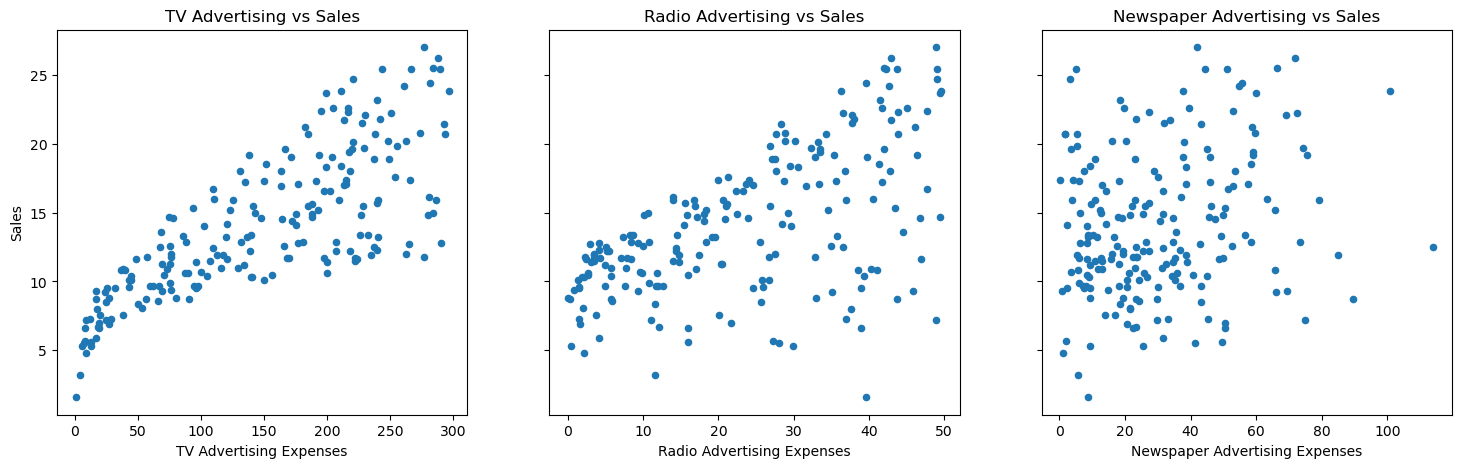

In [14]:
# Chart 1- Scatter plot visualization of Numerical Variable vs Target Variable
# Create a subplot with 1 row and 3 columns
fig, axs = plt.subplots(1, 3, sharey = True, figsize = (18, 5))

# Scatter plot for TV advertising expenses vs Sales
df.plot(kind = 'scatter', x = 'TV', y = 'Sales', ax = axs[0])
axs[0].set_title('TV Advertising vs Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs Sales
df.plot(kind = 'scatter', x = 'Radio', y = 'Sales', ax = axs[1])
axs[1].set_title('Radio Advertising vs Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs Sales
df.plot(kind = 'scatter', x = 'Newspaper', y = 'Sales', ax = axs[2])
axs[2].set_title('Newspaper Advertising vs Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Display the plots
plt.show()

### Chart 2 - Correlation Heatmap

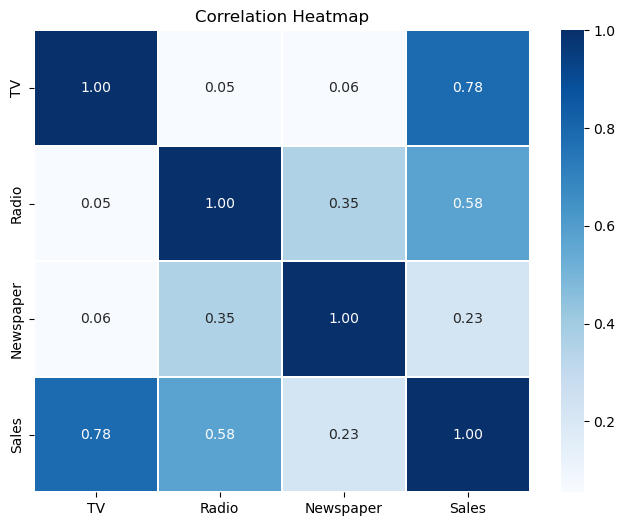

In [15]:
# Correlation Heatmap 
# Set the size of the plot
plt.figure(figsize = (8, 6))

# Create a Heatmap of the correlation matrix 
sns.heatmap(df.corr(), annot = True, linewidths = 0.2, fmt = '.2f', cmap = 'Blues')

# Set the title to the plot
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

From the above chart we can see that TV Advertising Expenses and Sales are highly correlated.

### Chart 3 - Pair plot

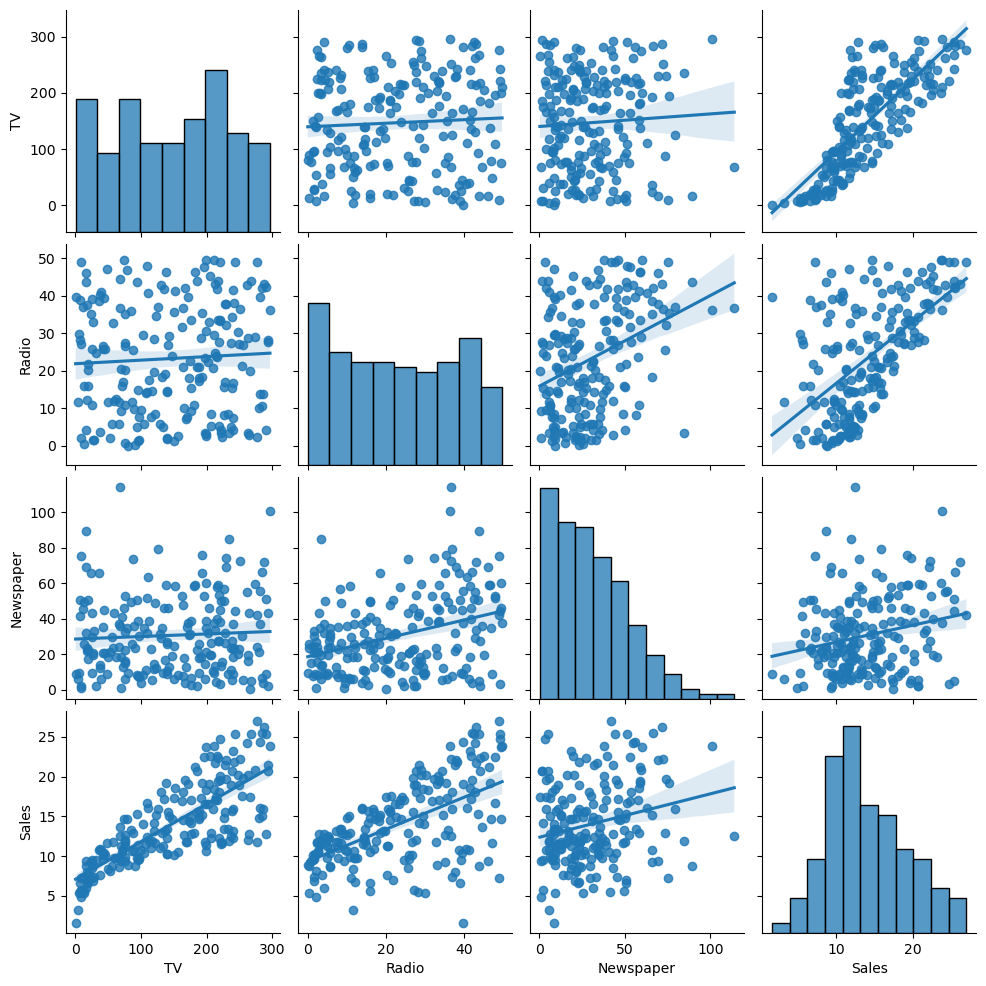

In [16]:
# Chart 3 - Pair plot
sns.pairplot(df, kind = 'reg')

# Display the plot
plt.show()

# 5. Feature Engineering and Data Preprocessing

### 1. Handling Outliers

In [17]:
# Removing the outliers 
df = df[df['Newspaper'] <= 90]

### 2. Feature Selection

In [18]:
# Select the features widely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales']] 
features

['TV', 'Radio', 'Newspaper']

In [19]:
# Remove multicolinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    # Calculating VIF
    vif = pd.DataFrame()
    vif['variables'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

In [20]:
continuous_variables = ['TV', 'Radio', 'Newspaper']

In [21]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [22]:
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [24]:
# Final data for modelling
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### 3. Data Transformation

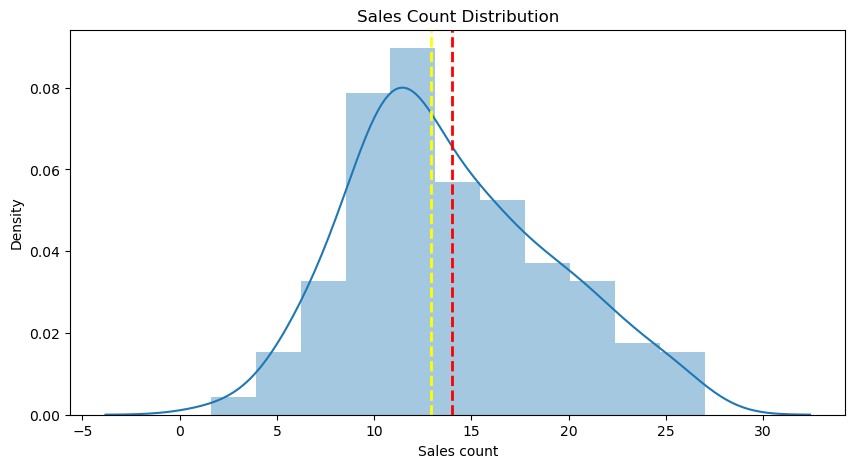

In [25]:
# Transform the data
# Visualization of the distribution of the dependent variable
plt.figure(figsize = (10, 5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
plt.axvline(df[dependent_variable[0]].median(), color = 'yellow', linestyle = 'dashed', linewidth = 2)
plt.show()

In [26]:
# Skew of the dependent variable
df[dependent_variable].skew()

Sales    0.40713
dtype: float64

In [27]:
# Defining dependent and independent variables
x = df.drop('Sales', axis = 1)
y = df[dependent_variable]

In [28]:
features

['TV', 'Radio', 'Newspaper']

### 4. Data Scalling

In [29]:
features = [i for i in df.columns if i not in ['Sales']]

In [30]:
# Scaling  your data
scaler = StandardScaler()
x = scaler.fit_transform(df[features])

### 5. Data Splitting

In [31]:
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [32]:
# Checking the train distribution of dependent varaiable
y_train.value_counts()

Sales
9.7      5
15.9     3
12.9     3
11.8     3
11.6     3
        ..
14.6     1
15.0     1
15.3     1
15.6     1
27.0     1
Name: count, Length: 96, dtype: int64

**Feature Selection Methods:**
- I employed the Variance Inflation Factor (VIF) to assess multicollinearity among continuous features in the dataset.

**Important Features:**
- For our analysis, I selected all numerical variables except the 'Sales' variable as our features. These were chosen based on their relevance to understanding the impact of TV, Radio, and Newspaper advertising on sales.

**Data Normality and Transformation:**
- Upon plotting distribution plots and conducting normality tests, I determined that the data exhibited a perfect normal distribution with negligible skewness, thus requiring no transformation.

**Data Scaling Method:**
- To standardize the independent features, each of which had different scales, I utilized the StandardScaler method. This approach ensures that all features are transformed to a comparable scale, facilitating more accurate model training and evaluation.

# 6. Model Implementation

In [33]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):
    '''This function accepts a model along with y_test and y_pred values to compute evaluation metrics, 
        visualize the actual versus predicted values, and returns a list of the model scores.'''
    
    # Calculating Evaluation Matrix
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    y_train_pred = model.predict(x_train)
    r2_train = r2_score(y_train, y_train_pred)
    r2 = r2_score(y_test, y_pred)
    r2_adjusted = 1 - (1 - r2)*((len(x_test) - 1) / (len(x_test) - x_test.shape[1] - 1))
    
    # Printing Evaluation Matrix
    print('MSE: ', mse)
    print('RMSE: ', rmse)
    print('MAE: ', mae)
    print('Train R2: ', r2_train)
    print('Test: ', r2)
    print('Adjusted R2: ', r2_adjusted)
        
    # Plot Actual and Predicted Values
    plt.figure(figsize = (10, 6))
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(['Predicted', 'Actual'])
    plt.title('Actual and Predicted Sales')
    
    model_score = [mse, rmse, mae, r2_train, r2, r2_adjusted]
    return model_score

In [34]:
# Create a Score Dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### 1. Model - Linear Regression

In [35]:
# Model Implemenatation
lr = LinearRegression()

# Fit the Model to the Training Data
lr.fit(x_train, y_train)

# Prediction
y_pred_lr = lr.predict(x_test)

#### 1. Model and its Performance

MSE:  3.1307300438931147
RMSE:  1.769386911868943
MAE:  1.3193429800279675
Train R2:  0.8949751177619989
Test:  0.8851774936997314
Adjusted R2:  0.8790262880050742


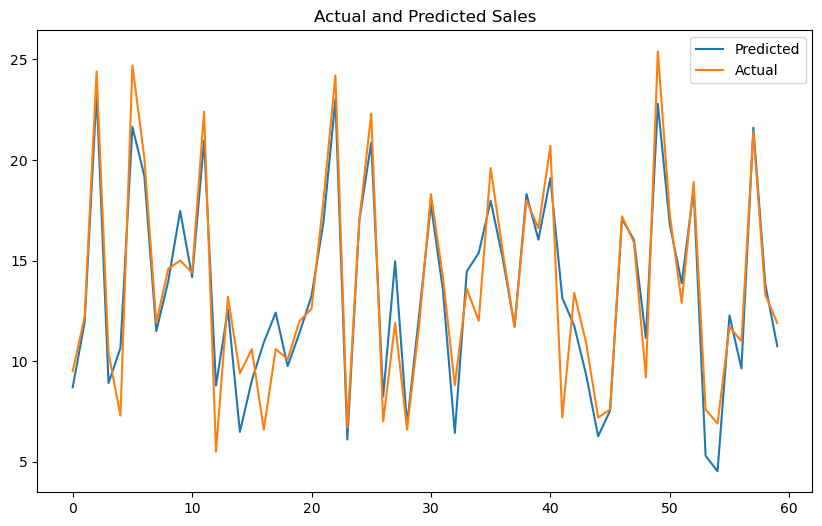

In [36]:
# Visualizing model score
lr_score = evaluate_model(lr, y_test, y_pred_lr)

In [37]:
# Update Evaluation metric Score Chart
score['Linear Regression'] = lr_score
score

,Linear Regression
MSE,3.130730
RMSE,1.769387
MAE,1.319343
Train R2,0.894975
Test R2,0.885177
Adjusted R2,0.879026


#### 2. Cross-Validation and Hyperparameter Tuning

In [38]:
# Defining the model
reg = LinearRegression()

# Parameters to be optimizaed
params = {'fit_intercept' : [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, params, cv = 5, scoring = 'r2', return_train_score = True)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print("Best Parameters are: ", best_params)

Best Parameters are:  {'fit_intercept': True}


In [39]:
# Train a new model with best parameters
lr_model2 = LinearRegression(fit_intercept = best_params['fit_intercept'])

# Fit the Model to the Training Data
lr_model2.fit(x_train, y_train)

# Prediction
y_pred_lr2 = lr_model2.predict(x_test)

MSE:  3.1307300438931147
RMSE:  1.769386911868943
MAE:  1.3193429800279675
Train R2:  0.8949751177619989
Test:  0.8851774936997314
Adjusted R2:  0.8790262880050742


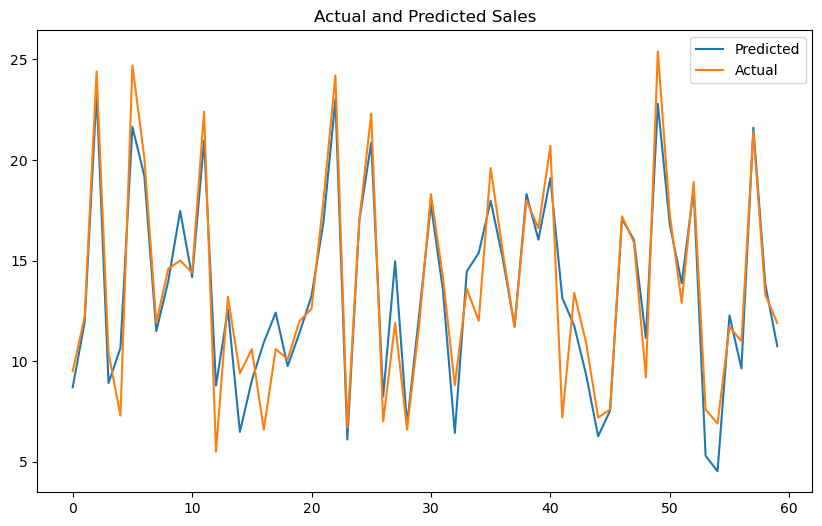

In [40]:
# Visualizing the model score
lr2_score = evaluate_model(lr_model2, y_test, y_pred_lr2)

In [41]:
# Update Evaluation metric score chart
score['Linear Regression Tuned'] = lr2_score
score

,Linear Regression,Linear Regression Tuned
MSE,3.130730,3.130730
RMSE,1.769387,1.769387
MAE,1.319343,1.319343
Train R2,0.894975,0.894975
Test R2,0.885177,0.885177
Adjusted R2,0.879026,0.879026


For Both tuned and untuned model, no changes is seen. Both are given good accuracy.

### 2. Model - Lasso Regression

In [42]:
# Model Implemenatation
lasso = Lasso()

# Fit the Model to the Training Data
lasso.fit(x_train, y_train)

# Prediction
y_pred_lasso = lasso.predict(x_test)

#### 1. Model and its Performance

MSE:  4.705136077248907
RMSE:  2.1691325633185508
MAE:  1.6002990120095442
Train R2:  0.8209833605681497
Test:  0.8274346528448306
Adjusted R2:  0.8181900806758037


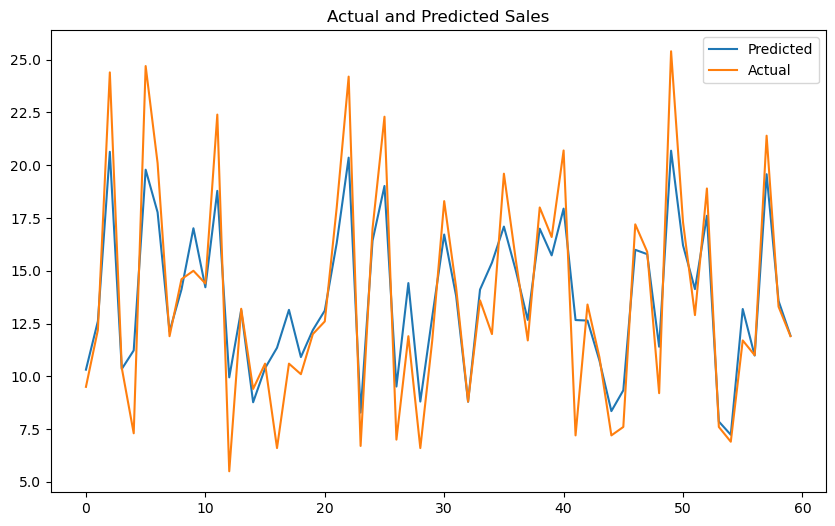

In [43]:
# Visualizing model score
lasso_score = evaluate_model(lasso, y_test, y_pred_lasso)

In [44]:
# Update Evaluation metric Score Chart
score['Lasso Regression'] = lasso_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression
MSE,3.130730,3.130730,4.705136
RMSE,1.769387,1.769387,2.169133
MAE,1.319343,1.319343,1.600299
Train R2,0.894975,0.894975,0.820983
Test R2,0.885177,0.885177,0.827435
Adjusted R2,0.879026,0.879026,0.818190


#### 2. Cross-Validation and Hyperparameter Tuning

In [45]:
# Define Model
lasso_reg = Lasso()

# Define the parameters to be optimized 
params = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Perform grid search 
grid_search = GridSearchCV(lasso_reg, params, cv = 5, scoring = 'neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'alpha': 0.01}


In [46]:
# Train a new model with best parameters
lasso2 = Lasso(alpha  = best_params['alpha'])

# Fit the model to the training data
lasso2.fit(x_train, y_train)

# Prediction
y_pred_lasso2 = lasso2.predict(x_test)

MSE:  3.12301330622065
RMSE:  1.767204941771228
MAE:  1.3172372305267563
Train R2:  0.8949668412894172
Test:  0.8854605124038648
Adjusted R2:  0.8793244684255004


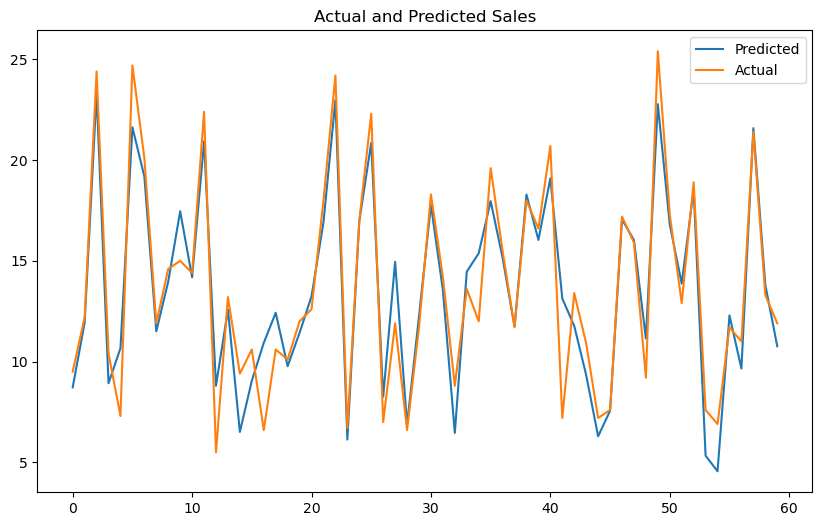

In [47]:
# Visualizing Evaluation metric score chart
lasso2_score = evaluate_model(lasso2, y_test, y_pred_lasso2)

In [48]:
# Update the Evaluation metric score chart
score['Lasso Regression Tuned'] = lasso2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned
MSE,3.130730,3.130730,4.705136,3.123013
RMSE,1.769387,1.769387,2.169133,1.767205
MAE,1.319343,1.319343,1.600299,1.317237
Train R2,0.894975,0.894975,0.820983,0.894967
Test R2,0.885177,0.885177,0.827435,0.885461
Adjusted R2,0.879026,0.879026,0.818190,0.879324


After tuning, I observed an increase in performance, with the train set reaching up to 89% and the test set up to 88%.

### Model 3 - Ridge Regression

In [49]:
# Model 3 - Implementation
ridge = Ridge()

# Fit the model to the training set
ridge.fit(x_train, y_train)

# Prediction
y_pred_ridge = ridge.predict(x_test)

#### 1. Model and its performance

MSE:  3.1570739118697566
RMSE:  1.7768156662607848
MAE:  1.3243768022110423
Train R2:  0.89493145742759
Test:  0.884211307249826
Adjusted R2:  0.878008341566781


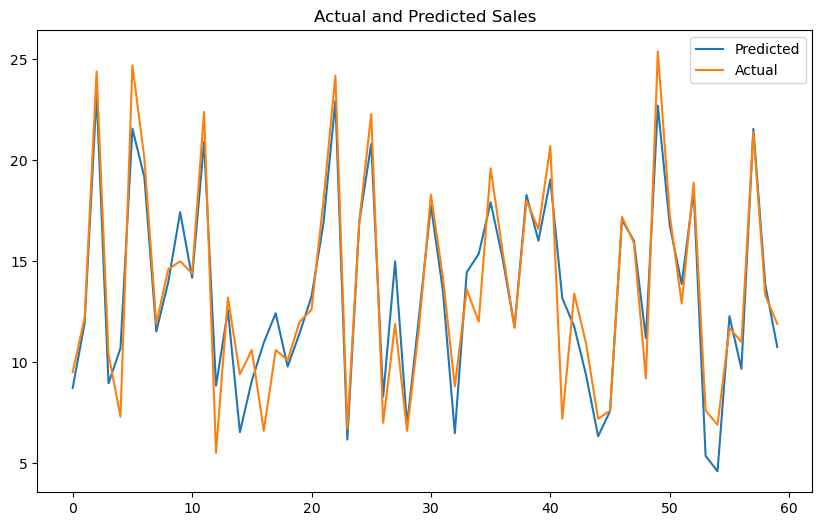

In [50]:
# Visualizing the Evaluation Metric Score Chart
ridge_score = evaluate_model(ridge, y_test, y_pred_ridge)

In [51]:
# Update the Evaluation Metric Score Chart
score['Ridge Regression'] = ridge_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression
MSE,3.130730,3.130730,4.705136,3.123013,3.157074
RMSE,1.769387,1.769387,2.169133,1.767205,1.776816
MAE,1.319343,1.319343,1.600299,1.317237,1.324377
Train R2,0.894975,0.894975,0.820983,0.894967,0.894931
Test R2,0.885177,0.885177,0.827435,0.885461,0.884211
Adjusted R2,0.879026,0.879026,0.818190,0.879324,0.878008


#### 2. Cross-Validation and Hyperparameter Tuning

In [52]:
# Model Defination
ridge1 = Ridge()

# Defining the parameters to be optimized
params = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60, 100]}

# Perform Grid search
grid_search = GridSearchCV(ridge1, params, cv = 5, scoring = 'neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
best_params = grid_search.best_params_
print("Best Parameters are: ", best_params)

Best Parameters are:  {'alpha': 0.01}


In [53]:
# Train a new model with the best parameters
ridge_model2 = Ridge(alpha = best_params['alpha'])

# Fit the model
ridge_model2.fit(x_train, y_train)

# Prediction
y_pred_ridge2 = ridge_model2.predict(x_test)

MSE:  3.1309837496668176
RMSE:  1.7694586035470898
MAE:  1.3193941195248053
Train R2:  0.8949751133248549
Test:  0.8851681887988325
Adjusted R2:  0.8790164846273414


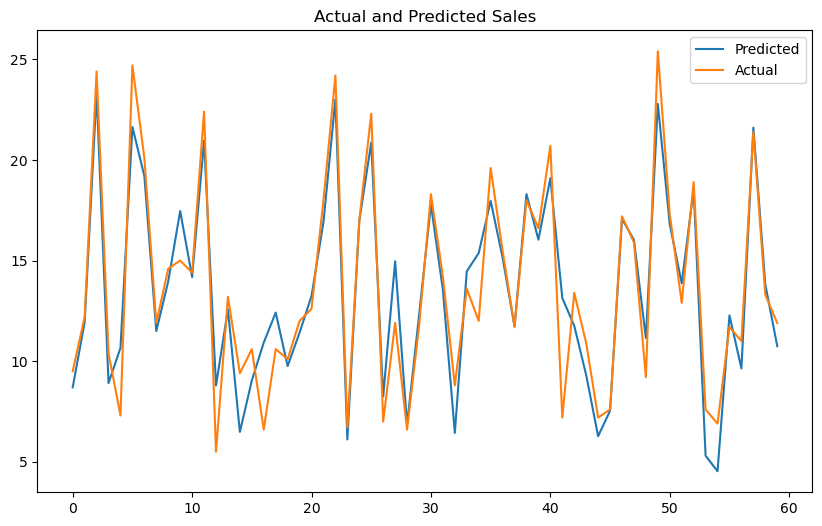

In [54]:
# Visualising Evaluation metric Score Chart
ridge2_score = evaluate_model(ridge_model2, y_test, y_pred_ridge2)

In [55]:
# Update the Evaluation Metric Score Chart
score['Ridge Regression Tuned'] = ridge2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned
MSE,3.130730,3.130730,4.705136,3.123013,3.157074,3.130984
RMSE,1.769387,1.769387,2.169133,1.767205,1.776816,1.769459
MAE,1.319343,1.319343,1.600299,1.317237,1.324377,1.319394
Train R2,0.894975,0.894975,0.820983,0.894967,0.894931,0.894975
Test R2,0.885177,0.885177,0.827435,0.885461,0.884211,0.885168
Adjusted R2,0.879026,0.879026,0.818190,0.879324,0.878008,0.879016


For Both tuned and untuned model, no changes is seen. Both are given good accuracy.

### Model 4 - Decision Tree

In [56]:
# Model 4 - Implementation
dt = DecisionTreeRegressor(random_state = 42)

# Fit the model to the training data
dt.fit(x_train, y_train)

# Prediction
y_pred_dt = dt.predict(x_test)

#### 1. Model and its performance

MSE:  1.23
RMSE:  1.1090536506409416
MAE:  0.9333333333333333
Train R2:  1.0
Test:  0.9548885784563825
Adjusted R2:  0.952471895159403


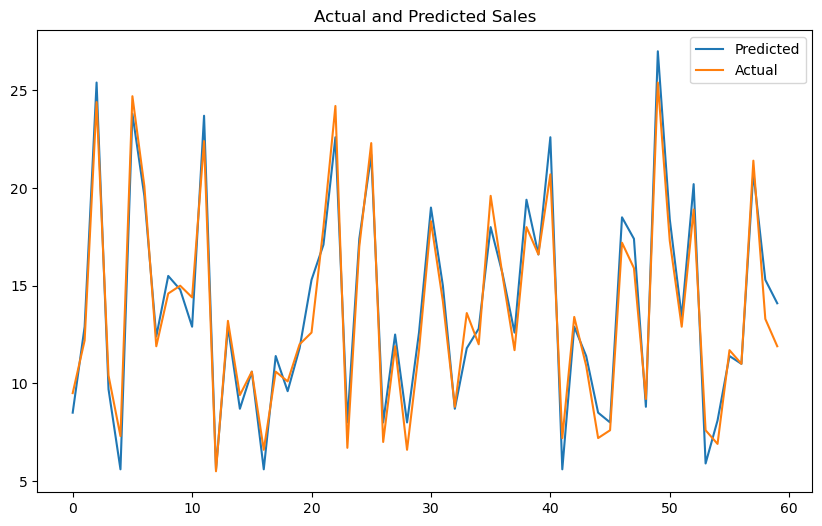

In [57]:
# Visualizing Evaluation Metric Score Chart
dt_score = evaluate_model(dt, y_test, y_pred_dt)

In [58]:
# Update Evaluation Metric Score Chart
score['Decision Tree'] = dt_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree
MSE,3.130730,3.130730,4.705136,3.123013,3.157074,3.130984,1.230000
RMSE,1.769387,1.769387,2.169133,1.767205,1.776816,1.769459,1.109054
MAE,1.319343,1.319343,1.600299,1.317237,1.324377,1.319394,0.933333
Train R2,0.894975,0.894975,0.820983,0.894967,0.894931,0.894975,1.000000
Test R2,0.885177,0.885177,0.827435,0.885461,0.884211,0.885168,0.954889
Adjusted R2,0.879026,0.879026,0.818190,0.879324,0.878008,0.879016,0.952472


#### 2. Cross-Validation and Hyperparameter Tuning

In [59]:
# Defining Model
Dt = DecisionTreeRegressor(random_state = 42)

# Define the parameters to be optimized
params = {'max_depth': [8, 10, 12, 14, 16],
         'min_samples_split': np.arange(35, 50),
         'min_samples_leaf': np.arange(22, 31, 2)}

# Perform grid search
grid_search = GridSearchCV(Dt, params, cv = 5, scoring = 'neg_mean_squared_error')

# fit the model
grid_search.fit(x_train, y_train)

# Print the best Paramters
best_params = grid_search.best_params_
print("Best parameters are: ", best_params)

Best parameters are:  {'max_depth': 8, 'min_samples_leaf': 24, 'min_samples_split': 35}


In [60]:
# Train a new model with the best parameters
dt_model2 = DecisionTreeRegressor(max_depth = best_params['max_depth'],
                                 min_samples_leaf = best_params['min_samples_leaf'],
                                 min_samples_split = best_params['min_samples_split'])

# Fit the model to the Training set
dt_model2.fit(x_train, y_train)

# Prediction
y_pred_dt2 = dt_model2.predict(x_test)

MSE:  4.653502329632234
RMSE:  2.157197795667387
MAE:  1.7804353572046356
Train R2:  0.7759467835768961
Test:  0.8293283697184994
Adjusted R2:  0.8201852466677048


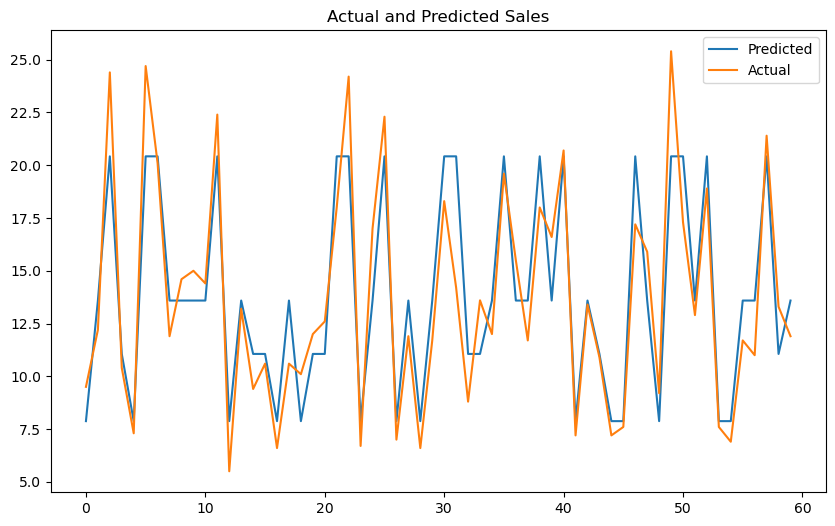

In [61]:
# Visualizing Evaluation metric Score Chart
dt2_score = evaluate_model(dt_model2, y_test, y_pred_dt2)

In [62]:
# Update Evaluate Metric Score Chart
score['Decision Tree Tuned'] = dt2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned
MSE,3.130730,3.130730,4.705136,3.123013,3.157074,3.130984,1.230000,4.653502
RMSE,1.769387,1.769387,2.169133,1.767205,1.776816,1.769459,1.109054,2.157198
MAE,1.319343,1.319343,1.600299,1.317237,1.324377,1.319394,0.933333,1.780435
Train R2,0.894975,0.894975,0.820983,0.894967,0.894931,0.894975,1.000000,0.775947
Test R2,0.885177,0.885177,0.827435,0.885461,0.884211,0.885168,0.954889,0.829328
Adjusted R2,0.879026,0.879026,0.818190,0.879324,0.878008,0.879016,0.952472,0.820185


From the previously tuned Decision Tree Regressor, we observed an initial overfitting issue. However, after tuning, the model no longer exhibits overfitting and demonstrates strong performance, achieving approximately 77% accuracy on the training data and 82% on the test data.

### Model 5 - Random Forest

In [63]:
# Model 5 - Implementation
rf = RandomForestRegressor(random_state = 42)

# Fit the model to the training set
rf.fit(x_train, y_train)

# Prediction
y_pred_rf = rf.predict(x_test)

#### 1. Model and its performance

MSE:  0.44460363333333464
RMSE:  0.6667860476444709
MAE:  0.5422333333333349
Train R2:  0.996283401833429
Test:  0.983693738273883
Adjusted R2:  0.9828201885385552


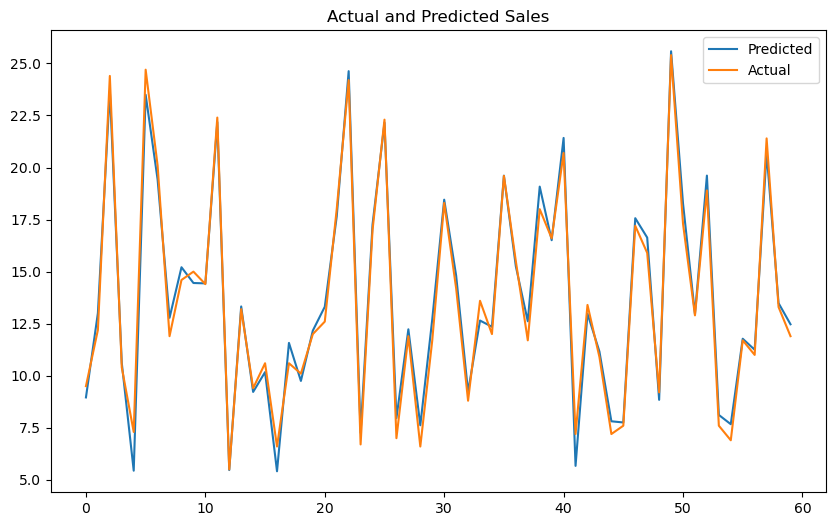

In [64]:
# Visualizing evaluation metric score chart
rf_score = evaluate_model(rf, y_test, y_pred_rf)

In [65]:
# Update evaluation metric score chart
score['Random Forest'] = rf_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned,Random Forest
MSE,3.130730,3.130730,4.705136,3.123013,3.157074,3.130984,1.230000,4.653502,0.444604
RMSE,1.769387,1.769387,2.169133,1.767205,1.776816,1.769459,1.109054,2.157198,0.666786
MAE,1.319343,1.319343,1.600299,1.317237,1.324377,1.319394,0.933333,1.780435,0.542233
Train R2,0.894975,0.894975,0.820983,0.894967,0.894931,0.894975,1.000000,0.775947,0.996283
Test R2,0.885177,0.885177,0.827435,0.885461,0.884211,0.885168,0.954889,0.829328,0.983694
Adjusted R2,0.879026,0.879026,0.818190,0.879324,0.878008,0.879016,0.952472,0.820185,0.982820


#### 2. Cross-Validation and Hyperparameter Tuning

In [66]:
# Model Definition
rf1 = RandomForestRegressor(random_state = 42)

# Find out parameters to be optimized
params = {'n_estimators': [300],
         'min_samples_leaf': np.arange(20, 25)}

# Perform Grid Search
grid_search = GridSearchCV(rf1, params, cv = 5, scoring = 'neg_mean_squared_error')

# Fit the Model
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters are: ", best_params)

Best hyperparameters are:  {'min_samples_leaf': 20, 'n_estimators': 300}


In [67]:
# Train a new Model with best parameters
rf_model2 = RandomForestRegressor(min_samples_leaf = best_params['min_samples_leaf'],
                                 n_estimators = best_params['n_estimators'],
                                 random_state = 42)

# Fit the Model to the training set
rf_model2.fit(x_train, y_train)

# Prediction
y_pred_rf2 = rf_model2.predict(x_test)

MSE:  4.149973852603546
RMSE:  2.037148461110173
MAE:  1.6728923549237733
Train R2:  0.8179367845781269
Test:  0.8477957562115538
Adjusted R2:  0.8396419574371727


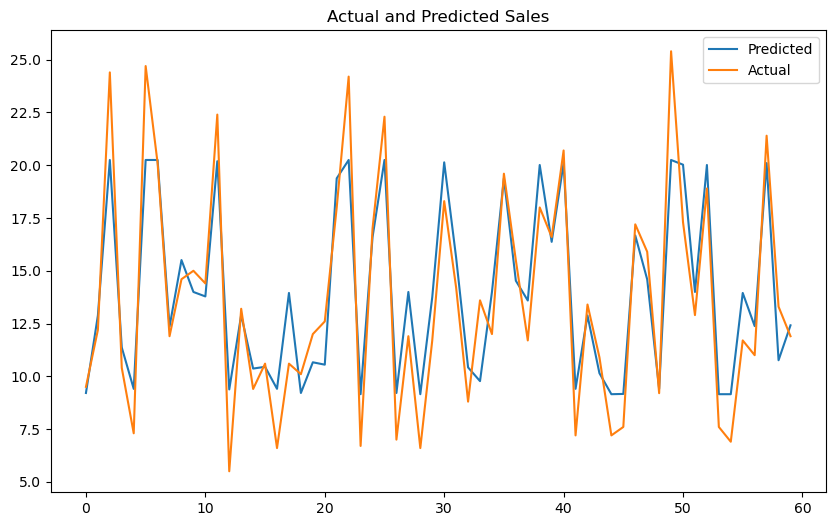

In [68]:
# visualizing the evaluation metric score chart
rf2_score = evaluate_model(rf_model2, y_test, y_pred_rf2)

In [69]:
# Update Evaluation Metric Score Chart
score['Random Forest Tuned'] = rf2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned
MSE,3.130730,3.130730,4.705136,3.123013,3.157074,3.130984,1.230000,4.653502,0.444604,4.149974
RMSE,1.769387,1.769387,2.169133,1.767205,1.776816,1.769459,1.109054,2.157198,0.666786,2.037148
MAE,1.319343,1.319343,1.600299,1.317237,1.324377,1.319394,0.933333,1.780435,0.542233,1.672892
Train R2,0.894975,0.894975,0.820983,0.894967,0.894931,0.894975,1.000000,0.775947,0.996283,0.817937
Test R2,0.885177,0.885177,0.827435,0.885461,0.884211,0.885168,0.954889,0.829328,0.983694,0.847796
Adjusted R2,0.879026,0.879026,0.818190,0.879324,0.878008,0.879016,0.952472,0.820185,0.982820,0.839642


No improvement was observed in the tuned model; the original model's performance is superior to that of the tuned model.

### Model 6 - Xtreme Gradient Boosting Regressor

In [70]:
# Model 6 - Implementation
xgb1 = xgb.XGBRegressor(random_state = 42)

# Fit the model to the Training set
xgb1.fit(x_train, y_train)

# Prediction
y_pred_xgb = xgb1.predict(x_test)

#### 1. Model and its performance

MSE:  0.43578696890531765
RMSE:  0.6601416279142814
MAE:  0.5679446363449099
Train R2:  0.9999999319638113
Test:  0.9840170978394284
Adjusted R2:  0.9831608709379692


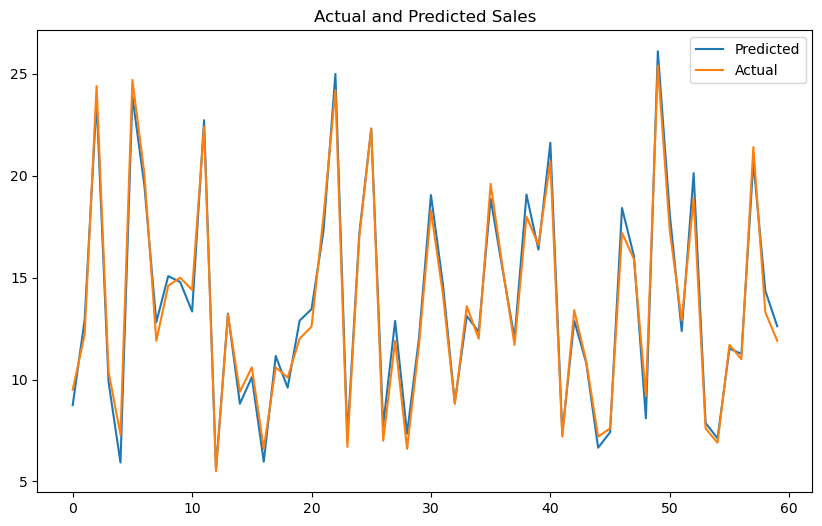

In [71]:
# Visualizing Evaluation metric score chart
xgb_score = evaluate_model(xgb1, y_test, y_pred_xgb)

In [72]:
# Update the Evaluation metric score chart
score['XGB'] = xgb_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,XGB
MSE,3.130730,3.130730,4.705136,3.123013,3.157074,3.130984,1.230000,4.653502,0.444604,4.149974,0.435787
RMSE,1.769387,1.769387,2.169133,1.767205,1.776816,1.769459,1.109054,2.157198,0.666786,2.037148,0.660142
MAE,1.319343,1.319343,1.600299,1.317237,1.324377,1.319394,0.933333,1.780435,0.542233,1.672892,0.567945
Train R2,0.894975,0.894975,0.820983,0.894967,0.894931,0.894975,1.000000,0.775947,0.996283,0.817937,1.000000
Test R2,0.885177,0.885177,0.827435,0.885461,0.884211,0.885168,0.954889,0.829328,0.983694,0.847796,0.984017
Adjusted R2,0.879026,0.879026,0.818190,0.879324,0.878008,0.879016,0.952472,0.820185,0.982820,0.839642,0.983161


#### 2. Cross-Validation and Hyperparameter Tuning

In [73]:
# Model Definition 
xgb2 = XGBRegressor(random_state = 42)

# Finding the parameters to be optimized
params = {'n_estimators': [500],
         'min_samples_leaf': np.arange(20, 25)}

# Perform Grid Search
grid_search = GridSearchCV(xgb2, params, cv = 5, scoring = 'neg_mean_squared_error')

# Fit the model
grid_search.fit(x_train, y_train)

# Print the parameters
best_params = grid_search.best_params_
print("Best Parameters are: ", best_params)

Best Parameters are:  {'min_samples_leaf': 20, 'n_estimators': 500}


In [74]:
# Train a new model with best parameters
xgb_model2 = XGBRegressor(min_samples_leaf = best_params['min_samples_leaf'],
                          n_estimators = best_params['n_estimators'], 
                          random_state = 42)

# Fit the Model to the training set
xgb_model2.fit(x_train, y_train)

# Prediction 
y_pred_xgb2 = xgb_model2.predict(x_test)

MSE:  0.43578696890531765
RMSE:  0.6601416279142814
MAE:  0.5679446363449099
Train R2:  0.9999999319449914
Test:  0.9840170978394284
Adjusted R2:  0.9831608709379692


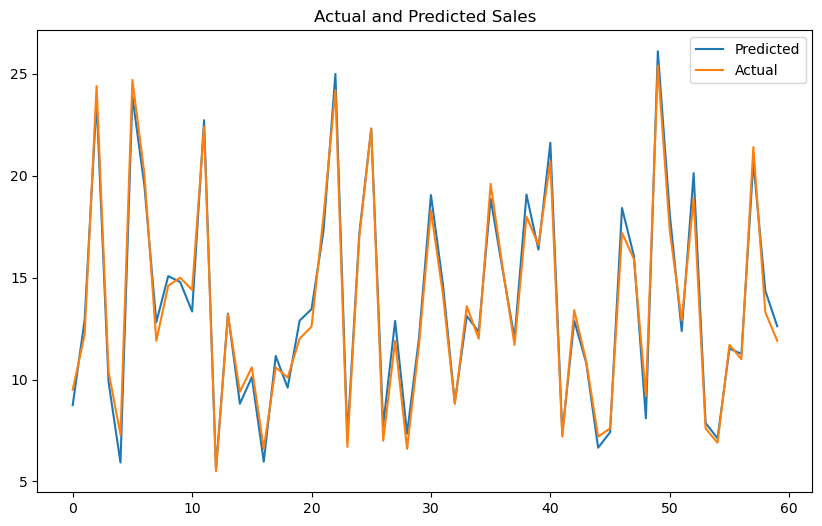

In [75]:
# Visualizing evaluation metric score chart
xgb2_score = evaluate_model(xgb_model2, y_test, y_pred_xgb2)

In [76]:
# Update Evaluation Metric Score Chart
score['XGB Tuned'] = xgb2_score
score

,Linear Regression,Linear Regression Tuned,Lasso Regression,Lasso Regression Tuned,Ridge Regression,Ridge Regression Tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,XGB,XGB Tuned
MSE,3.130730,3.130730,4.705136,3.123013,3.157074,3.130984,1.230000,4.653502,0.444604,4.149974,0.435787,0.435787
RMSE,1.769387,1.769387,2.169133,1.767205,1.776816,1.769459,1.109054,2.157198,0.666786,2.037148,0.660142,0.660142
MAE,1.319343,1.319343,1.600299,1.317237,1.324377,1.319394,0.933333,1.780435,0.542233,1.672892,0.567945,0.567945
Train R2,0.894975,0.894975,0.820983,0.894967,0.894931,0.894975,1.000000,0.775947,0.996283,0.817937,1.000000,1.000000
Test R2,0.885177,0.885177,0.827435,0.885461,0.884211,0.885168,0.954889,0.829328,0.983694,0.847796,0.984017,0.984017
Adjusted R2,0.879026,0.879026,0.818190,0.879324,0.878008,0.879016,0.952472,0.820185,0.982820,0.839642,0.983161,0.983161


After tuning the model, I obtained the same accuracy on both the train and test data. Both models are still overfitted.

In [77]:
score.columns

Index(['Linear Regression', 'Linear Regression Tuned', 'Lasso Regression',
       'Lasso Regression Tuned', 'Ridge Regression', 'Ridge Regression Tuned',
       'Decision Tree', 'Decision Tree Tuned', 'Random Forest',
       'Random Forest Tuned', 'XGB', 'XGB Tuned'],
      dtype='object')

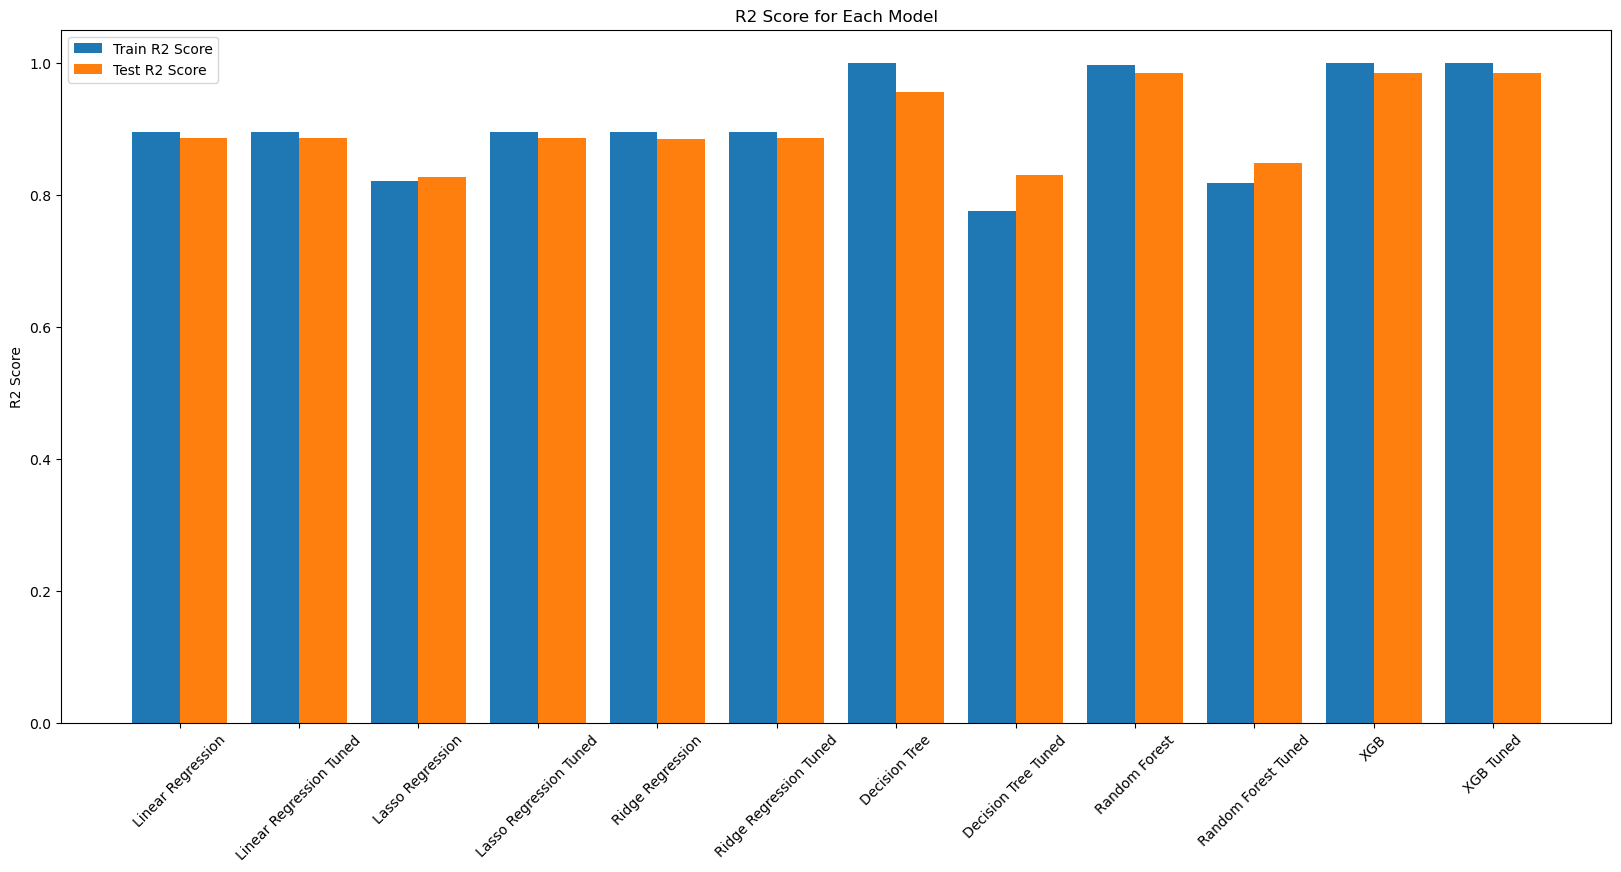

In [78]:
# R2 Score Plot
models = list(score.columns)
train = score.iloc[-3, :]
test = score.iloc[-2, :]

x_axis = np.arange(len(models))

plt.figure(figsize = (20, 9))
plt.bar(x_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(x_axis + 0.2, test, 0.4, label = 'Test R2 Score')
plt.xticks(x_axis, models, rotation = 45)
plt.ylabel('R2 Score')
plt.title('R2 Score for Each Model')
plt.legend()
plt.show()